In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
save_path = "/content/drive/MyDrive/JSS_analysis"

# Processing

In [ ]:
path = "/content/CI_t1_processed.csv"
df_t1 = pd.read_csv(path)
len(df_t1)

5958

In [ ]:
path = "/content/CI_t0_processed.csv"
df_t0 = pd.read_csv(path)
len(df_t0)

5006

In [ ]:
actions = list(df_t1["Action Name"])

In [ ]:
df_t0 = df_t0[df_t0['Action_Name'].isin(actions)]
len(df_t0)

5006

In [ ]:
actions = list(df_t0["Action_Name"])
df_t1 = df_t1[df_t1['Action Name'].isin(actions)]
len(df_t1)

5006

In [ ]:
df_t0.to_csv(save_path +"/CI_t0_dataset.csv", index=False)
df_t1.to_csv(save_path +"/CI_t1_dataset.csv", index=False)

# Relation count

## Time 1

In [ ]:
path = "./CI_t1_dataset.csv"
df = pd.read_csv(path)

In [ ]:
df_indep = df[df["Independent"] == True]
len(df_indep)

528

In [ ]:
df_subset = df[df["subset_count"] > 0]
len(df_subset)

261

In [ ]:
df_intersect = df[df["intersect_count"] > 0]
len(df_intersect)

4283

In [ ]:
df_t = df[df["same_feat_count"]>0]
len(df_t)

335

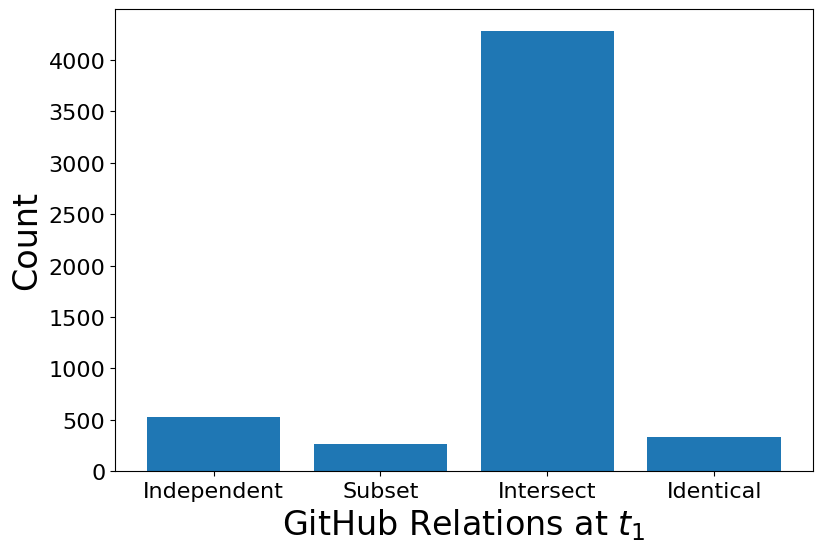

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Independent', 'Subset', 'Intersect', 'Identical']
counts = [len(df_indep), len(df_subset), len(df_intersect), len(df_t)]

# Create a bar diagram
plt.figure(figsize=(9, 6))
plt.bar(categories, counts)

# Adding title and labels
plt.xlabel("GitHub Relations at "+r'$t_1$', fontsize=24)
plt.ylabel('Count', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot

plt.savefig(save_path + '/t1_relation_count.pdf', format='pdf')
plt.show()

## Time t0

In [ ]:
path = "./CI_t0_dataset.csv"
df = pd.read_csv(path)
print(len(df))
df.head()

5006


,Action_Name,date,Processed_Features,Independent,Single_featured,subset_count,super_set_actions,intersect_count,intersecting_actions,same_feat_count,actions_with_same_features,publisher
0,(Yet Another) Setup jq,2023-02-12 18:42:02,"['path jq executable', 'installs astarte kuber...",False,False,0,[],9,"[('(Yet Another) Setup yq', 0.1), ('Astarte Lo...",0,[],vegardit
1,(Yet Another) Setup yq,2023-02-12 18:46:24,"['pullrequestovides path yq executable', 'conv...",False,False,0,[],5,"[('(Yet Another) Setup jq', 0.1), ('Godot Setu...",0,[],vegardit
2,.env parser action,2022-09-08 15:56:35,"['display textlint result github', 'oas file p...",False,False,0,[],23,"[('Append decoded base64 to file', 0.25), ('au...",0,[],ahmadnassri
3,.NET MAUI - Apple Provisioning,2023-04-14 15:37:27,['pullrequestovide passphrase certificate file...,False,False,0,[],17,"[('assign-org-project', 0.06666666666666667), ...",0,[],maui-actions
4,20Scoops-CNX-Localizer,2019-11-27 06:04:34,"['localizer file', 'pullrequestovide data file...",False,False,0,[],27,"[('action-prepend', 0.14285714285714285), ('Ad...",0,[],20Scoops-CNX


In [ ]:
df_indep = df[df["Independent"] == True]
len(df_indep)

639

In [ ]:
df_subset = df[df["subset_count"] > 0]
len(df_subset)

774

In [ ]:
df_intersect = df[df["intersect_count"] > 0]
len(df_intersect)

4041

In [ ]:
df_t = df[df["same_feat_count"]>0]
len(df_t)

1415

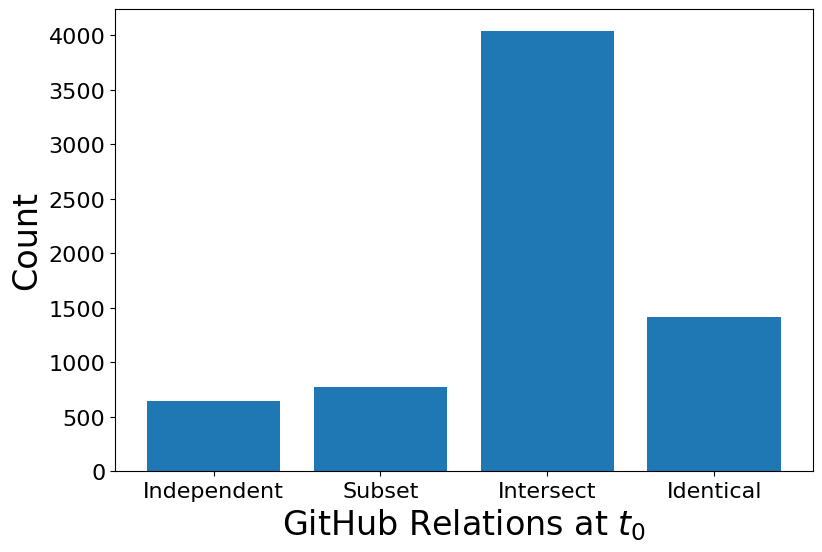

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Independent', 'Subset', 'Intersect', 'Identical']
counts = [len(df_indep), len(df_subset), len(df_intersect), len(df_t)]

# Create a bar diagram
plt.figure(figsize=(9, 6))
plt.bar(categories, counts)

# Adding title and labels
plt.xlabel("GitHub Relations at "+r'$t_0$', fontsize=24)
plt.ylabel('Count', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


# Show the plot
plt.savefig(save_path + '/t0_relation_count.pdf', format='pdf')
plt.show()


# Subset and independent distributions

## Time t1

In [ ]:
path = "./CI_t1_dataset.csv"
df = pd.read_csv(path)

In [ ]:
df_subset = df[df["subset_count"] > 0]
len(df_subset)

261

In [ ]:
df_intersect = df_subset[df_subset["intersect_count"] > 0]
len(df_intersect)

105

In [ ]:
df_intersect.head()

,Action Name,verified creator,publisher,star,action_name_used,Contributors,action_file_descriptions,Processed_Features,Independent,Single_featured,subset_count,super_set_actions,intersect_count,intersecting_actions,same_feat_count,actions_with_same_features
168,data-factory-validate,True,Azure,[7],data-factory-validate,"['fedeoliv', 'microsoftopensource', 'raflyalk'...",['Validate all of the Azure Data Factory resou...,"['data factory resource id', 'directory contai...",False,False,1,"[('data-factory-export', 0.75)]",2,"[('data-factory-deploy-tb', 0.125), ('Azure St...",0,[]
183,Azure Pipelines Action,True,Azure,[68],azure-pipelines-action,"['Josh-01', 'nishubansal', 'keifgwinn', 'appsd...","['Trigger a run in Azure pipelines', 'Fullyqua...",['paste personal access token user value secre...,False,False,1,"[('Custom Azure Pipelines Action', 0.83)]",7,"[('Okteto Pipeline', 0.09090909090909091), ('A...",2,"['Azure Pipelines Action with Result Check', '..."
210,Xcode Notarize Please,False,adriweb,0,xcode-notarize-please,[],"['Notarize your Mac application or plugin, wai...",['verbose mode pullrequestint notarization api...,False,False,1,"[('Xcode Notarize Longer', 0.89)]",247,"[('Orca Security - Container Image Scanning', ...",0,[]
324,Push it somewhere!,False,Ackee-Blockchain,0,push-it-somewhere,[],['Useful to push files to another repository t...,"['name destination usernameorganization', 'spe...",False,False,2,[('Push directory to another repository with p...,480,"[('Nullify DAST Action', 0.05), ('Docker promo...",0,[]
337,AWS S3 Bucket Creation,False,alialrubaye,0,aws-s3-bucket-creation,['alialrubaye'],"['Create a new bucket in AWS S3 on demand', 'N...","['create new bucket aws s3 demand', 'name buck...",False,False,1,"[('AWS S3 Create Bucket', 0.83)]",71,"[('KSOC Guard', 0.125), ('Jscrambler', 0.05555...",0,[]


In [ ]:
df_t = df_intersect[df_intersect["same_feat_count"]>0]
len(df_t)

30

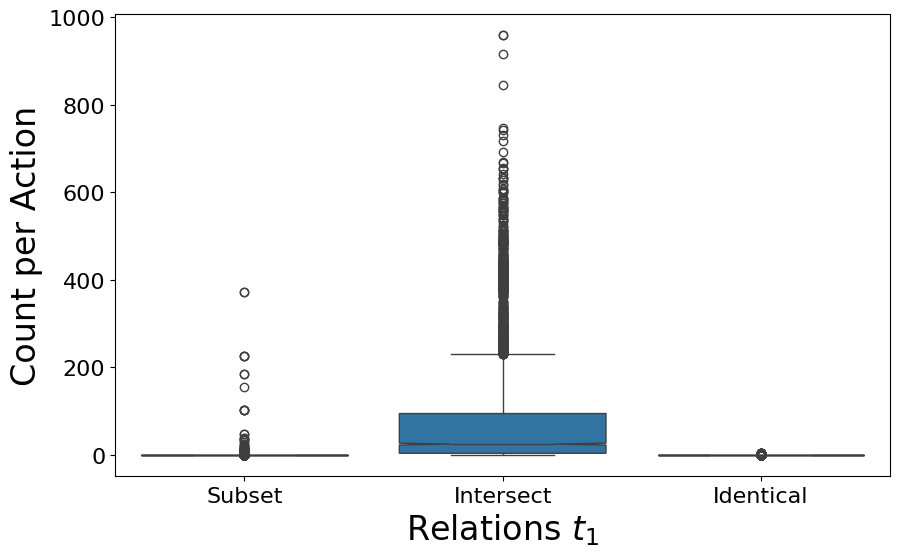

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df[['subset_count', 'intersect_count', 'same_feat_count']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)

plt.xlabel('Relations ' + r'$t_1$', fontsize=24)
plt.ylabel('Count per Action', fontsize=24)

new_labels = ['Subset', 'Intersect', 'Identical']  # Your desired x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(save_path + '/t1_relation_dist_all.pdf', format='pdf')
plt.show()

### commonality percentage distribution


In [ ]:
df = df.reset_index(drop=True)
for i in range(len(df.index)):
  df["super_set_actions"][i] = ast.literal_eval(df["super_set_actions"][i])

In [ ]:
df["superset_overlap_percent_avg"] = ""

for i in range(len(df.index)):
  data_list = df["super_set_actions"][i]
  percent_list = []
  for elm in data_list:
    percent = elm[1] *100
    percent_list.append(percent)

  if len(percent_list) != 0:
    avg = round(sum(percent_list)/len(percent_list),2)
  else: avg = 0
  df["superset_overlap_percent_avg"][i] = avg


In [ ]:
for i in range(len(df.index)):
  df["intersecting_actions"][i] = ast.literal_eval(df["intersecting_actions"][i])

In [ ]:
df["intersect_overlap_percent_avg"] = ""

for i in range(len(df.index)):
  data_list = df["intersecting_actions"][i]
  percent_list = []
  for elm in data_list:
    percent = elm[1] *100
    percent_list.append(percent)

  if len(percent_list) != 0:
    avg = round(sum(percent_list)/len(percent_list),2)
  else: avg = 0
  df["intersect_overlap_percent_avg"][i] = avg


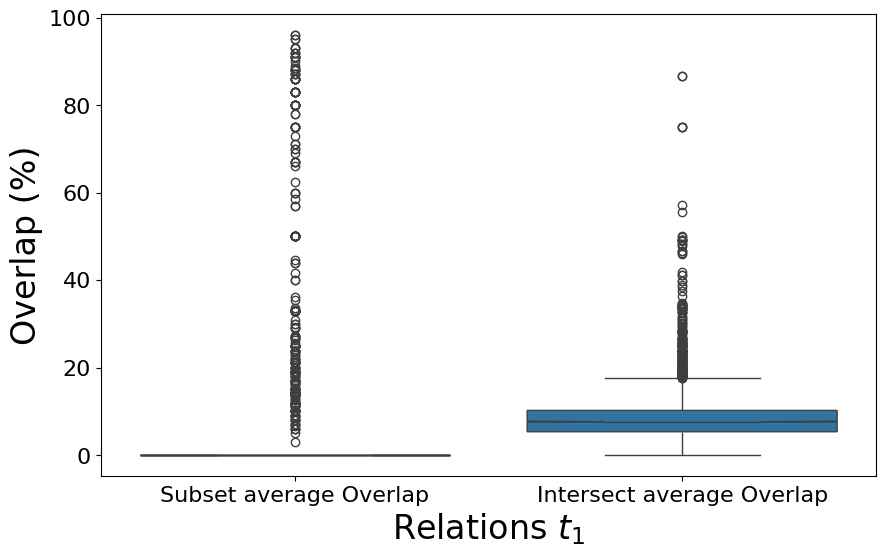

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df[['superset_overlap_percent_avg', 'intersect_overlap_percent_avg']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)

plt.xlabel('Relations ' + r'$t_1$', fontsize=24)
plt.ylabel('Overlap (%)', fontsize=24)
new_labels = ['Subset average Overlap', 'Intersect average Overlap']  # Your desired x-axis labels
plt.xticks(ticks=[0, 1], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(save_path + '/t1_relation_overlap_dist_all.pdf', format='pdf')
plt.show()

## time t0

In [ ]:
path = "./CI_t0_dataset.csv"
df = pd.read_csv(path)

In [ ]:
df_subset = df[df["subset_count"] > 0]
len(df_subset)

774

In [ ]:
df_intersect = df_subset[df_subset["intersect_count"] > 0]
len(df_intersect)

545

In [ ]:
test =  df[df["intersect_count"] > 0]
test = test[test["subset_count"] > 0]
len(test)

545

In [ ]:
df_intersect.head()

In [ ]:
df_t = df_intersect[df_intersect["same_feat_count"]>0]
len(df_t)

503

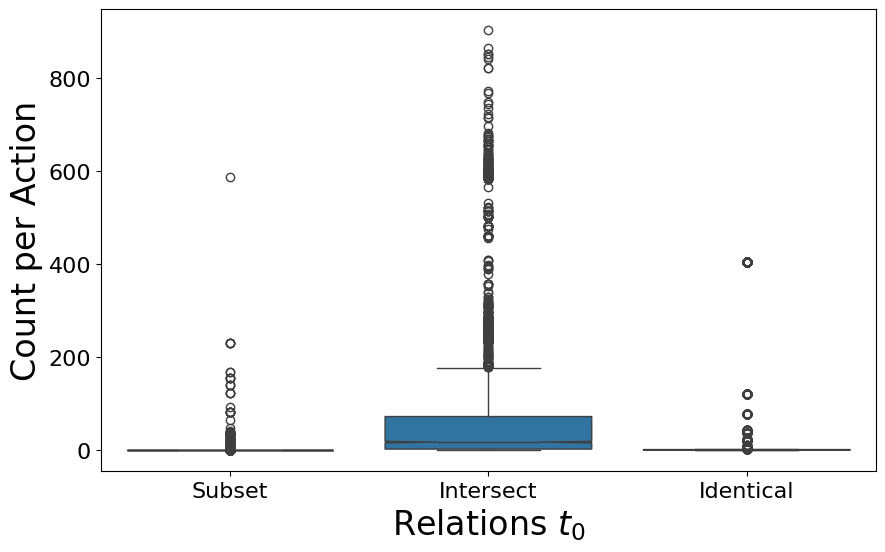

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df[['subset_count', 'intersect_count', 'same_feat_count']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch=True)

plt.xlabel('Relations ' + r'$t_0$', fontsize=24)
plt.ylabel('Count per Action', fontsize=24)

new_labels = ['Subset', 'Intersect', 'Identical']  # Your desired x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(save_path + '/t0_relation_dist_all.pdf', format='pdf')
plt.show()

### commonality percentage distribution


In [ ]:
df = df.reset_index(drop=True)
for i in range(len(df.index)):
  df["super_set_actions"][i] = ast.literal_eval(df["super_set_actions"][i])

In [ ]:
df["superset_overlap_percent_avg"] = ""

for i in range(len(df.index)):
  data_list = df["super_set_actions"][i]
  percent_list = []
  for elm in data_list:
    percent = elm[1] *100
    percent_list.append(percent)

  if len(percent_list) != 0:
    avg = round(sum(percent_list)/len(percent_list),2)
  else: avg = 0
  df["superset_overlap_percent_avg"][i] = avg


In [ ]:
for i in range(len(df.index)):
  df["intersecting_actions"][i] = ast.literal_eval(df["intersecting_actions"][i])

In [ ]:
df["intersect_overlap_percent_avg"] = ""

for i in range(len(df.index)):
  data_list = df["intersecting_actions"][i]
  percent_list = []
  for elm in data_list:
    percent = elm[1] *100
    percent_list.append(percent)

  if len(percent_list) != 0:
    avg = round(sum(percent_list)/len(percent_list),2)
  else: avg = 0
  df["intersect_overlap_percent_avg"][i] = avg


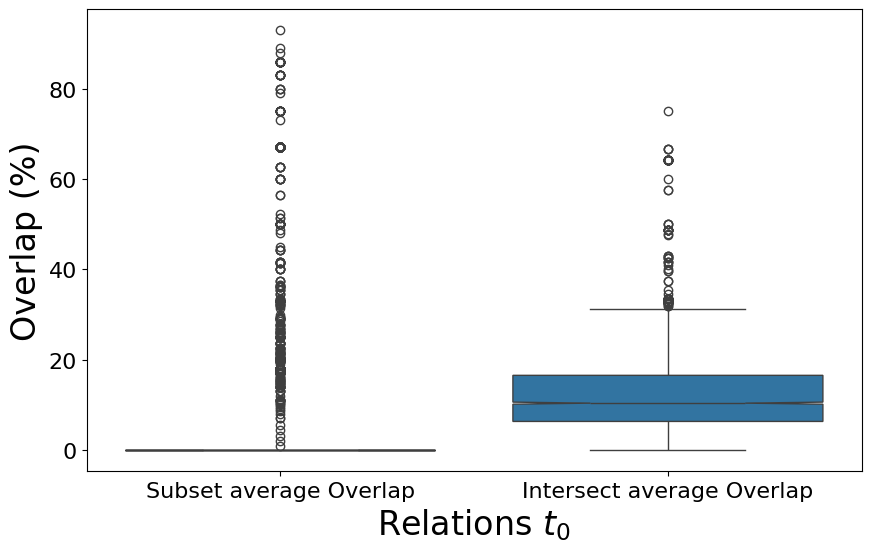

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df[['superset_overlap_percent_avg', 'intersect_overlap_percent_avg']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)
plt.xlabel('Relations ' + r'$t_0$', fontsize=24)
plt.ylabel('Overlap (%)', fontsize=24)
new_labels = ['Subset average Overlap', 'Intersect average Overlap']  # Your desired x-axis labels
plt.xticks(ticks=[0, 1], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(save_path + '/t0_relation_overlap_dist_all.pdf', format='pdf')
plt.show()

# Relations evolution

## Time t0

### processing

In [ ]:
path = "./CI_t0_dataset.csv"
df0 = pd.read_csv(path)
df0 = df0.sort_values(by='Action_Name')
df0 = df0.reset_index()
print(len(df0))
try: df0 = df0.drop(columns='index')
except: pass
df0_t = df0[df0["same_feat_count"]>0]

In [ ]:
df_change = pd.DataFrame(columns = ["Action_a", "Action_b", "t0_relation", "extent"])

for i in range(len(df0.index)):
  action_a = df0["Action_Name"][i]
  #### Independent
  is_indep = df0["Independent"][i]
  if is_indep:
    relation = "independent"
    new_row = {"Action_a":action_a, "Action_b": "", "t0_relation": relation, "extent": ""}
    df_change.loc[len(df_change)] = new_row
  #### Subset relation
  subset_count = df0["subset_count"][i]
  if subset_count > 0:
    super_set_list = ast.literal_eval(df0["super_set_actions"][i])
    for elm in super_set_list:
      action_b = elm[0]
      extent = elm[1]
      relation = "subset"
      new_row = {"Action_a":action_a, "Action_b": action_b, "t0_relation": relation, "extent": extent}
      df_change.loc[len(df_change)] = new_row


In [ ]:
for i in range(len(df0.index)):
  action_a = df0["Action_Name"][i]

  #### intersect
  intersect_count = df0["intersect_count"][i]
  if intersect_count > 0:
    intersect_list = ast.literal_eval(df0["intersecting_actions"][i])
    for elm in intersect_list:
      action_b = elm[0]
      extent = elm[1]
      relation = "Intersect"
      new_row = {"Action_a":action_a, "Action_b": action_b, "t0_relation": relation, "extent": extent}
      df_change.loc[len(df_change)] = new_row

  print("Finished: " + str(i))

In [ ]:
df_change.to_csv(save_path + "/CI_t0_relations.csv", index = False)

In [ ]:
path = save_path + "/CI_t0_relations.csv"
df_change = pd.read_csv(path)

In [ ]:
len(list(set(list(df_change["Action_a"]))))

4909

In [ ]:
df_change

,Action_a,Action_b,t0_relation,extent
0,42 Norminette,NaN,independent,NaN
1,A pull request (PR) based Github Action workfl...,NaN,independent,NaN
2,A3K Diff,UI-licious Test Runner,subset,0.180000
3,AIO CLI Setup,miranum-cli-action,subset,0.500000
4,AIO CLI Setup,Run command AWS CLI,subset,0.250000
...,...,...,...,...
406758,🔂 Surge PR Preview,YC GitHub Runner,Intersect,0.050000
406759,🔂 Surge PR Preview,ZEIT Now Deployment,Intersect,0.250000
406760,🔂 Surge PR Preview,Zip Europa Universalis IV mod,Intersect,0.166667
406761,🔂 Surge PR Preview,ZON Baseproject SA,Intersect,0.166667


In [ ]:
for i in range(len(df0.index)):
  action_a = df0["Action_Name"][i]

  #### Identical
  same_feat_count = df0["same_feat_count"][i]
  if same_feat_count > 0:
    intersect_list = ast.literal_eval(df0["actions_with_same_features"][i])
    for elm in intersect_list:
      relation = "Identical"
      new_row = {"Action_a":action_a, "Action_b": elm, "t0_relation": relation, "extent": ""}
      df_change.loc[len(df_change)] = new_row

  print("Finished: " + str(i))





In [ ]:
values = df_change['t0_relation'].value_counts()
values

,count
t0_relation,
Intersect,397762
Identical,158405
subset,8362
independent,639


In [ ]:
df_change.to_csv(save_path + "/CI_t0_relations_v02.csv", index = False)

### Analysis

In [ ]:
path = save_path + "/CI_t0_relations_v02.csv"
df = pd.read_csv(path)

In [ ]:
df = df.sort_values(by='Action_a')
df = df.drop_duplicates()
df = df.reset_index()
try: df = df.drop(columns='index')
except: pass
try: df = df.drop(columns='level_0')
except: pass


In [ ]:
values = df['t0_relation'].value_counts()
values

,count
t0_relation,
Intersect,397762
Identical,158405
subset,8362
independent,639


## Time 1


### processing

In [ ]:
path = "./CI_t1_dataset.csv"
df1 = pd.read_csv(path)
df1 = df1.sort_values(by='Action Name')
df1 = df1.reset_index()
try: df1 = df1.drop(columns='index')
except: pass

In [ ]:
df_change = pd.DataFrame(columns = ["Action_a", "Action_b", "t1_relation", "t1_extent"])

for i in range(len(df1.index)):
  action_a = df1["Action Name"][i]
  ### Independent
  is_indep = df1["Independent"][i]
  if is_indep:
    relation = "independent"
    new_row = {"Action_a":action_a, "Action_b": "", "t1_relation": relation, "t1_extent": ""}
    df_change.loc[len(df_change)] = new_row
  #### Subset relation
  subset_count = df1["subset_count"][i]
  if subset_count > 0:
    super_set_list = ast.literal_eval(df1["super_set_actions"][i])
    for elm in super_set_list:
      action_b = elm[0]
      extent = elm[1]
      relation = "subset"
      new_row = {"Action_a":action_a, "Action_b": action_b, "t1_relation": relation, "t1_extent": extent}
      df_change.loc[len(df_change)] = new_row

In [ ]:
df_change.to_csv(save_path + "/CI_t1_relations.csv", index = False)

In [ ]:
for i in range(len(df1.index)):
  action_a = df1["Action Name"][i]

  #### intersect
  intersect_count = df1["intersect_count"][i]
  if intersect_count > 0:
    intersect_list = ast.literal_eval(df1["intersecting_actions"][i])
    for elm in intersect_list:
      action_b = elm[0]
      extent = elm[1]
      relation = "Intersect"
      new_row = {"Action_a":action_a, "Action_b": action_b, "t1_relation": relation, "t1_extent": extent}
      df_change.loc[len(df_change)] = new_row

  print("Finished: " + str(i))

In [ ]:
values = df_change['t1_relation'].value_counts()
values

,count
t1_relation,
Intersect,406812
subset,3484
independent,528


In [ ]:
df_change.to_csv(save_path + "/CI_t1_relations.csv", index = False)

In [ ]:
for i in range(len(df1.index)):
  action_a = df1["Action Name"][i]

  #### Identical
  same_feat_count = df1["same_feat_count"][i]
  if same_feat_count > 0:
    intersect_list = ast.literal_eval(df1["actions_with_same_features"][i])
    for elm in intersect_list:
      relation = "Identical"
      new_row = {"Action_a":action_a, "Action_b": elm, "t1_relation": relation, "t1_extent": ""}
      df_change.loc[len(df_change)] = new_row

  print("Finished: " + str(i))

In [ ]:
df_change.to_csv(save_path + "/CI_t1_relations.csv", index = False)

In [ ]:
df_change = pd.read_csv(save_path + "/CI_t1_relations.csv")
values = df_change['t1_relation'].value_counts()
values

,count
t1_relation,
Intersect,406812
subset,3484
independent,528
Identical,471


In [ ]:
import pandas as pd 

path = "CI_t0_relations_v02.csv"
df0 = pd.read_csv(path)

path = "CI_t1_relations.csv"
df1 = pd.read_csv(path)

df0["t1_relation"] = ""; df0["t1_extent"] = ""

for i in range(len(df0.index)):
  action_a0 = df0["Action_a"][i]
  action_b0 = df0["Action_b"][i]
  t0_relation = df0["t0_relation"][i]
  df_temp_a1 = df1[df1["Action_a"] == action_a0]
  df_temp_a1 = df_temp_a1.reset_index(drop=True)
  if len(df_temp_a1) == 1:
    print(df_temp_a1["t1_relation"][0])
    df0["t1_relation"][i] = df_temp_a1["t1_relation"][0]
    df0["t1_extent"][i] = df_temp_a1["t1_extent"][0]
  else:
    df_temp_b1 = df_temp_a1[df_temp_a1["Action_b"] == action_b0]
    df_temp_b1 = df_temp_b1.reset_index(drop=True)
    if len(df_temp_b1) != 1:
      if len(df_temp_b1) == 0: pass
      else:
        print(action_a0)
        print(action_b0)
        print(df_temp_b1)
        break
    else:
      df0["t1_relation"][i] == df_temp_b1["t1_relation"][0]
      df0["t1_extent"][i] == df_temp_b1["t1_extent"][0]
  print("Finished: " + str(i) + "/" + str(len(df0.index)))

df0.to_csv("feature_evolution.csv", index=False)

## Analysis

### T0 relations

In [ ]:
path = "./feature_evolution.csv"
df = pd.read_csv(path)
df = df.drop_duplicates()
len(df)

565168

In [ ]:
values = df['t0_relation'].value_counts()
values

,count
t0_relation,
Intersect,397762
Identical,158405
subset,8362
independent,639


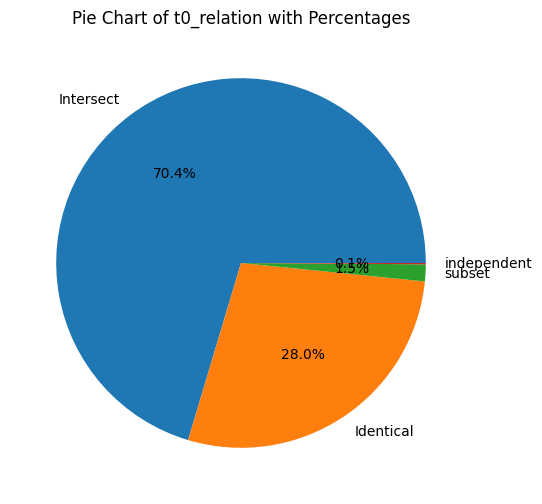

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(values, labels=values.index, autopct='%1.1f%%')
plt.title('Pie Chart of t0_relation with Percentages')
plt.show()

In [ ]:
values = df['t1_relation'].value_counts()
values

,count
t1_relation,
independent,30616
Intersect,7651
subset,2566
Identical,373


In [ ]:
df_cleaned = df.dropna(subset=['t1_relation'])
print(len(df_cleaned))


41206


### T1 relations

In [ ]:
path1 = "./CI_t1_relations.csv"
df1 = pd.read_csv(path1)
print(len(df1))
values = df1['t1_relation'].value_counts()
values

411295


,count
t1_relation,
Intersect,406812
subset,3484
independent,528
Identical,471


In [ ]:
# Get the value counts with percentages
values_percentage = df1['t1_relation'].value_counts(normalize=True) * 100

# Display the result
values_percentage


,proportion
t1_relation,
Intersect,98.910028
subset,0.847081
independent,0.128375
Identical,0.114516


### Relation Evolution

In [ ]:
path = "./feature_evolution.csv"
df = pd.read_csv(path)
df = df.drop_duplicates()
df = df.dropna(subset=['t1_relation'])
df = df.reset_index(drop=True)
len(df)

41206

#### independent relation

In [ ]:
df_indep_0 = df[df["t0_relation"] == "independent"]
len(df_indep_0)

378

In [ ]:
df_indep_indep = df_indep_0[df_indep_0["t1_relation"] == "independent"]

In [ ]:
df_cleaned = df_indep_indep.drop_duplicates(subset=['Action_a'])
len(df_cleaned)

316

In [ ]:
df_indep_subset = df_indep_0[df_indep_0["t1_relation"] == "subset"]
print(len(df_indep_subset))
df_indep_subset.head()

14


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
114,Conform Action,NaN,independent,NaN,subset,0.17
120,Create an cloudfront invalidation,NaN,independent,NaN,subset,0.08
147,Dump context,NaN,independent,NaN,subset,0.12
229,GHA PR Commenter,NaN,independent,NaN,subset,0.09
386,HTTP Cache Proxy,NaN,independent,NaN,subset,0.14


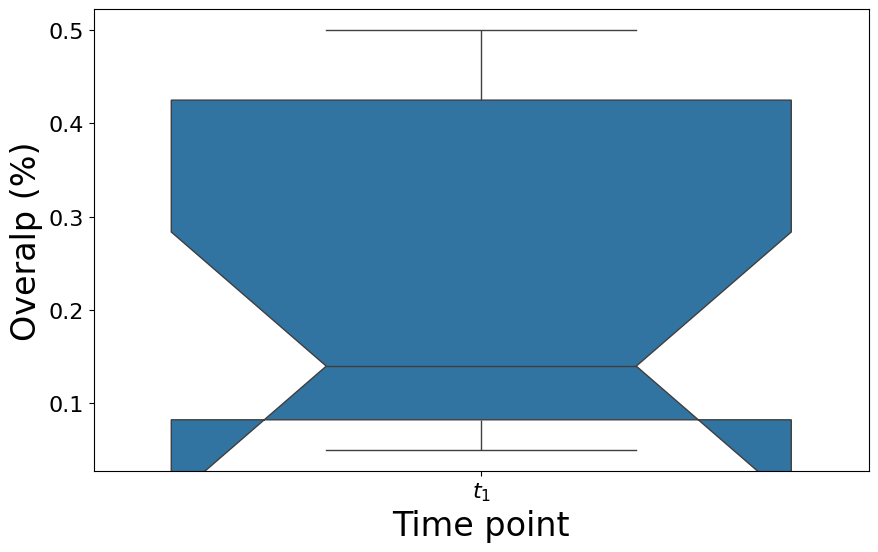

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df_indep_subset[['t1_extent']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)

plt.xlabel('Time point', fontsize=24)
plt.ylabel('Overalp (%)', fontsize=24)

new_labels = [r'$t_1$']  # Your desired x-axis labels
plt.xticks(ticks=[0], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [ ]:
df_indep_intersect = df_indep_0[df_indep_0["t1_relation"] == "Intersect"]

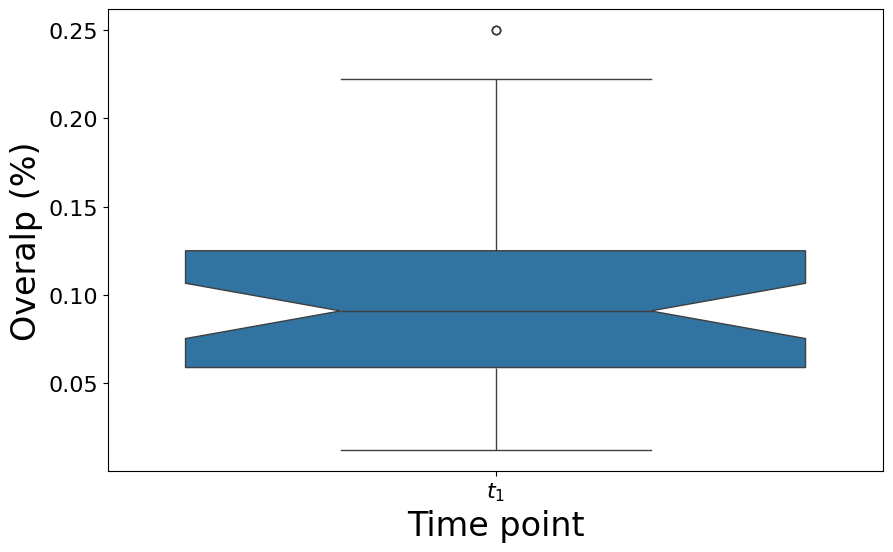

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df_indep_intersect[['t1_extent']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)

plt.xlabel('Time point', fontsize=24)
plt.ylabel('Overalp (%)', fontsize=24)

new_labels = [r'$t_1$']  # Your desired x-axis labels
plt.xticks(ticks=[0], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [ ]:
df_indep_ideentical = df_indep_0[df_indep_0["t1_relation"] == "Identical"]

In [ ]:
df_cleaned = df_indep_ideentical.drop_duplicates(subset=['Action_a'])
len(df_cleaned)

4

#### Subset relation

In [ ]:
df_subset_0 = df[df["t0_relation"] == "subset"]
len(df_subset_0)

727

In [ ]:
df_sub_sub = df_subset_0[df_subset_0["t1_relation"] == "subset"]
print(len(df_sub_sub))
df_sub_sub.head()

61


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
13,Algorand Contract,Provenance Action,subset,0.20,subset,0.17
14,Android accept licenses,libGDX Android upload,subset,0.14,subset,0.06
15,Android accept licenses,Nrwl Nx Android Release Builder,subset,0.20,subset,0.06
16,Android accept licenses,Unity - Builder,subset,0.05,subset,0.06
131,Deploy WordPress,Trellis Deploy - FORK,subset,0.17,subset,0.11


In [ ]:
df_sub_sub[df_sub_sub["t1_extent"]>0.4]

,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
590,Notify Discord,Actions for Discord,subset,0.50,subset,0.50
1060,purge-workflow-runs,UI-licious Test Runner,subset,0.18,subset,0.67


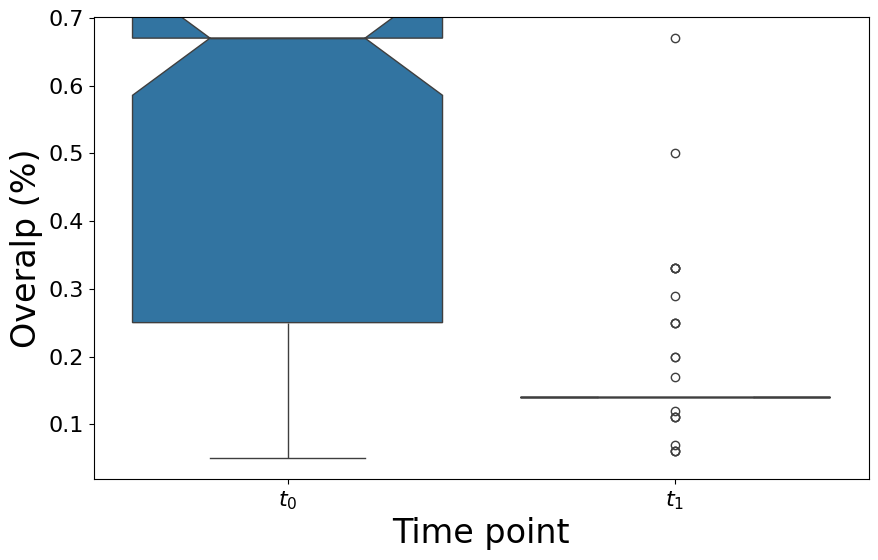

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df_sub_sub[['extent', 't1_extent']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)
plt.xlabel('Time point', fontsize=24)
plt.ylabel('Overalp (%)', fontsize=24)

new_labels = [r'$t_0$', r'$t_1$']  # Your desired x-axis labels
plt.xticks(ticks=[0, 1], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(save_path + '/subset_evolution_overlap.pdf', format='pdf')
plt.show()

In [ ]:

df_sub_indep = df_subset_0[df_subset_0["t1_relation"] == "independent"]
print(len(df_sub_indep))
df_sub_indep.head()

619


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
17,AndroidLint report to checkstyle converter,UI-licious Test Runner,subset,0.18,independent,NaN
28,Azure KeyVault Secrets,UI-licious Test Runner,subset,0.18,independent,NaN
35,Blockless Action Setup,EESSI,subset,0.17,independent,NaN
36,Blockless Action Setup,Install Chrome,subset,0.50,independent,NaN
37,Blockless Action Setup,Install Deck,subset,0.50,independent,NaN


In [ ]:
df_cleaned = df_sub_indep.drop_duplicates(subset=['Action_a'])
len(df_cleaned)

57

In [ ]:

df_sub_inter = df_subset_0[df_subset_0["t1_relation"] == "Intersect"]
print(len(df_sub_inter))
df_sub_inter.head()

41


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
23,Auto Merge Branches,UI-licious Test Runner,subset,0.18,Intersect,0.111111
74,Build and Deploy React app to GitHub Pages,Deploy react application to github pages with ...,subset,0.40,Intersect,0.333333
75,Build and publish a DNAnexus applet,Go modfile information,subset,0.67,Intersect,0.111111
76,Build and publish a DNAnexus applet,inject secrets into file,subset,0.67,Intersect,0.111111
97,Compile LateX,Compile and publish all LaTeX,subset,0.12,Intersect,0.250000


In [ ]:

df_sub_id = df_subset_0[df_subset_0["t1_relation"] == "Identical"]
print(len(df_sub_id))
df_sub_id.head()

6


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
2,AWS SAM Deploy Action,Apply AWS Cloudformation,subset,0.20,Identical,NaN
3,AWS SAM Deploy Action,AWS CF to .env,subset,0.17,Identical,NaN
4,AWS SAM Deploy Action,AWS Edge Static Stack,subset,0.07,Identical,NaN
5,AWS SAM Deploy Action,CloudFormation Deploy,subset,0.17,Identical,NaN
6,AWS SAM Deploy Action,Cloudron Deploy,subset,0.17,Identical,NaN


#### Intersect

In [ ]:
df_intersect_0 = df[df["t0_relation"] == "Intersect"]
len(df_intersect_0)

22665

In [ ]:
df_inter_inter = df_intersect_0[df_intersect_0["t1_relation"] == "Intersect"]
print(len(df_inter_inter))
df_inter_inter.head()

5042


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
1137,Acryl dbt Impact Analysis Action,dbt coves action,Intersect,0.142857,Intersect,0.100000
1138,Action Ref Linter,Flake8 Linting,Intersect,0.333333,Intersect,0.250000
1139,Action Ref Linter,Kotlin Linter (ktlint),Intersect,0.333333,Intersect,0.250000
1140,Action Regex Match,Delete github package versions,Intersect,0.050000,Intersect,0.866667
1141,Action Regex Match,Delete GitHub Packages Versions,Intersect,0.050000,Intersect,0.866667


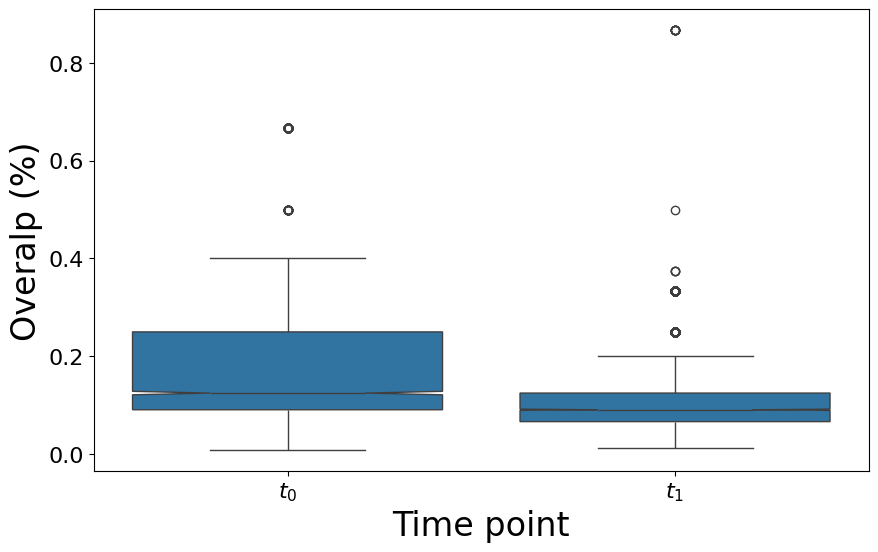

In [ ]:
import seaborn as sns

# Count distributions
# Select a subset of columns
subset = df_inter_inter[['extent', 't1_extent']]

# Create a boxplot for the subset of columns
df_melted = subset.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch = True)

plt.xlabel('Time point', fontsize=24)
plt.ylabel('Overalp (%)', fontsize=24)

new_labels = [r'$t_0$', r'$t_1$']  # Your desired x-axis labels
plt.xticks(ticks=[0, 1], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(save_path + '/intersect_evolution_overlap.pdf', format='pdf')
plt.show()

In [ ]:
df_inter_indep = df_intersect_0[df_intersect_0["t1_relation"] == "independent"]
print(len(df_inter_indep))
df_inter_indep.head()

15735


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
1105,AKS Check Quantity Deployment,arweave-ens-action,Intersect,0.125000,independent,NaN
1106,ANSI to HTML,AWS CDK GitHub Actions - support docker login,Intersect,0.125000,independent,NaN
1107,ANSI to HTML,AWS CDK GitHub Actions with Java,Intersect,0.090909,independent,NaN
1108,ANSI to HTML,AWS CDK GitHub Actions,Intersect,0.125000,independent,NaN
1109,ANSI to HTML,AWS ECS Run Task,Intersect,0.090909,independent,NaN


In [ ]:
df_inter_sub = df_intersect_0[df_intersect_0["t1_relation"] == "subset"]
print(len(df_inter_sub))
df_inter_sub.head()

1557


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
4005,Check License and date from prs files,ab-story-validation,Intersect,0.333333,subset,0.25
4006,Check License and date from prs files,Action Discord Alerts,Intersect,0.058824,subset,0.25
4007,Check License and date from prs files,action-check-label,Intersect,0.142857,subset,0.25
4008,Check License and date from prs files,action-visual-snapshot,Intersect,0.166667,subset,0.25
4009,Check License and date from prs files,actions-android-ci,Intersect,0.200000,subset,0.25


In [ ]:
df_inter_id = df_intersect_0[df_intersect_0["t1_relation"] == "Identical"]
print(len(df_inter_id))
df_inter_id.head()

331


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
4778,Cloudflare Update DNSLink,Cloud Run helper,Intersect,0.100000,Identical,NaN
4779,Cloudflare Web3 Hostname DNSLink Update,Cloud Run helper,Intersect,0.100000,Identical,NaN
11637,On-demand self-hosted AWS EC2 runner for GitHu...,FHIR IG Action,Intersect,0.222222,Identical,NaN
11638,On-demand self-hosted AWS EC2 runner for GitHu...,Terraform Orchestration Action,Intersect,0.750000,Identical,NaN
11662,OpenShift Self Hosted Runner Installer,metal-github-runner,Intersect,0.125000,Identical,NaN


#### Identical

In [ ]:
df_id_0 = df[df["t0_relation"] == "Identical"]
len(df_id_0)

17436

In [ ]:
df_id_id = df_id_0[df_id_0["t1_relation"] == "Identical"]
print(len(df_id_id))
df_id_id.head()

32


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
23770,Android Emulator,Android Emulator (faruktoptas),Identical,NaN,Identical,NaN
23771,Android Emulator (faruktoptas),Android Emulator,Identical,NaN,Identical,NaN
24584,Auto Update,pr-shipit,Identical,NaN,Identical,NaN
25518,Build Jekyll ToolBox,Build Jekyll ToolBox from a subdirectory,Identical,NaN,Identical,NaN
25519,Build Jekyll ToolBox from a subdirectory,Build Jekyll ToolBox,Identical,NaN,Identical,NaN


In [ ]:
df_id_sub = df_id_0[df_id_0["t1_relation"] == "subset"]
print(len(df_id_sub))
df_id_sub.head()

934


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
25970,Check License and date from prs files,Check License or Date from github PR files,Identical,NaN,subset,0.25
28925,Kotlin main kts runner,Artifact remover,Identical,NaN,subset,0.03
28926,Kotlin main kts runner,Check and report Android Lint result,Identical,NaN,subset,0.03
28927,Kotlin main kts runner,Check Runner Availability,Identical,NaN,subset,0.03
28928,Kotlin main kts runner,Cognition Deploy,Identical,NaN,subset,0.03


In [ ]:
df_id_indep = df_id_0[df_id_0["t1_relation"] == "independent"]
print(len(df_id_indep))
df_id_indep.head()

13946


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
23772,Android Problem Matchers,Android SDK Tools,Identical,NaN,independent,NaN
23773,Android Problem Matchers,Setup Android SDK Tools,Identical,NaN,independent,NaN
23774,AndroidLint report to checkstyle converter,@ForesightMiningSoftwareCorporationis-newer-ve...,Identical,NaN,independent,NaN
23775,AndroidLint report to checkstyle converter,@kibibitgitflow-hotfix,Identical,NaN,independent,NaN
23776,AndroidLint report to checkstyle converter,A3K Diff,Identical,NaN,independent,NaN


In [ ]:
df_id_inter = df_id_0[df_id_0["t1_relation"] == "Intersect"]
print(len(df_id_inter))
df_id_inter.head()

2524


,Action_a,Action_b,t0_relation,extent,t1_relation,t1_extent
24178,Apple Provisioning Profile Action,Apple Certificate Action,Identical,NaN,Intersect,0.125000
24180,Auto Merge Branches,@ForesightMiningSoftwareCorporationis-newer-ve...,Identical,NaN,Intersect,0.111111
24181,Auto Merge Branches,@kibibitgitflow-hotfix,Identical,NaN,Intersect,0.111111
24182,Auto Merge Branches,A3K Diff,Identical,NaN,Intersect,0.111111
24183,Auto Merge Branches,Acorn Setup,Identical,NaN,Intersect,0.111111


# early adopters

## with outlier

In [ ]:
path = save_path + "/CI_t0_dataset.csv"
df = pd.read_csv(path)

In [ ]:
grouped_df = df.groupby('date').agg({
    'publisher': pd.Series.nunique  # count unique developers
}).reset_index()
df_sorted = grouped_df.sort_values(by=['publisher'])
df_sorted.tail()

,date,publisher
344,2019-11-08 04:09:39,6
888,2020-03-29 14:44:47,7
31,2019-08-23 06:52:25,7
23,2019-08-21 10:19:35,8
1694,2020-12-13 11:40:57,9


In [ ]:
import pandas as pd

# Ensure the 'release date' is in datetime format and sort by release date
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by='date')

# Initialize an empty set to keep track of unique developers
unique_developers = set()

# Function to calculate cumulative unique developers up to that point
def cumulative_unique_developers(row):
    unique_developers.add(row['publisher'])  # Add current developer to the set
    return len(unique_developers)            # Return the current count of unique developers

# Apply the cumulative counting function to each row
df_sorted['cumulative_developers'] = df_sorted.apply(cumulative_unique_developers, axis=1)

# Now df_sorted contains a new column with cumulative unique developer counts
print(df_sorted[['date', 'publisher', 'cumulative_developers']])


                    date            publisher  cumulative_developers
2451 2015-02-13 03:23:42            Makeshift                      1
1140 2019-06-24 20:19:34                jnwng                      2
1099 2019-06-24 20:19:34             coursier                      3
284  2019-06-24 20:19:34           MCKanpolat                      4
4734 2019-06-24 20:38:21           seemethere                      5
...                  ...                  ...                    ...
245  2024-05-22 14:57:52          arturo-lang                   3867
1913 2024-06-05 09:12:29       ActionsToolbox                   3867
4758 2024-08-12 03:15:59  RageAgainstThePixel                   3868
4122 2024-08-12 03:18:11  RageAgainstThePixel                   3868
4914 2024-08-20 15:46:40         PietroLubini                   3869

[5006 rows x 3 columns]


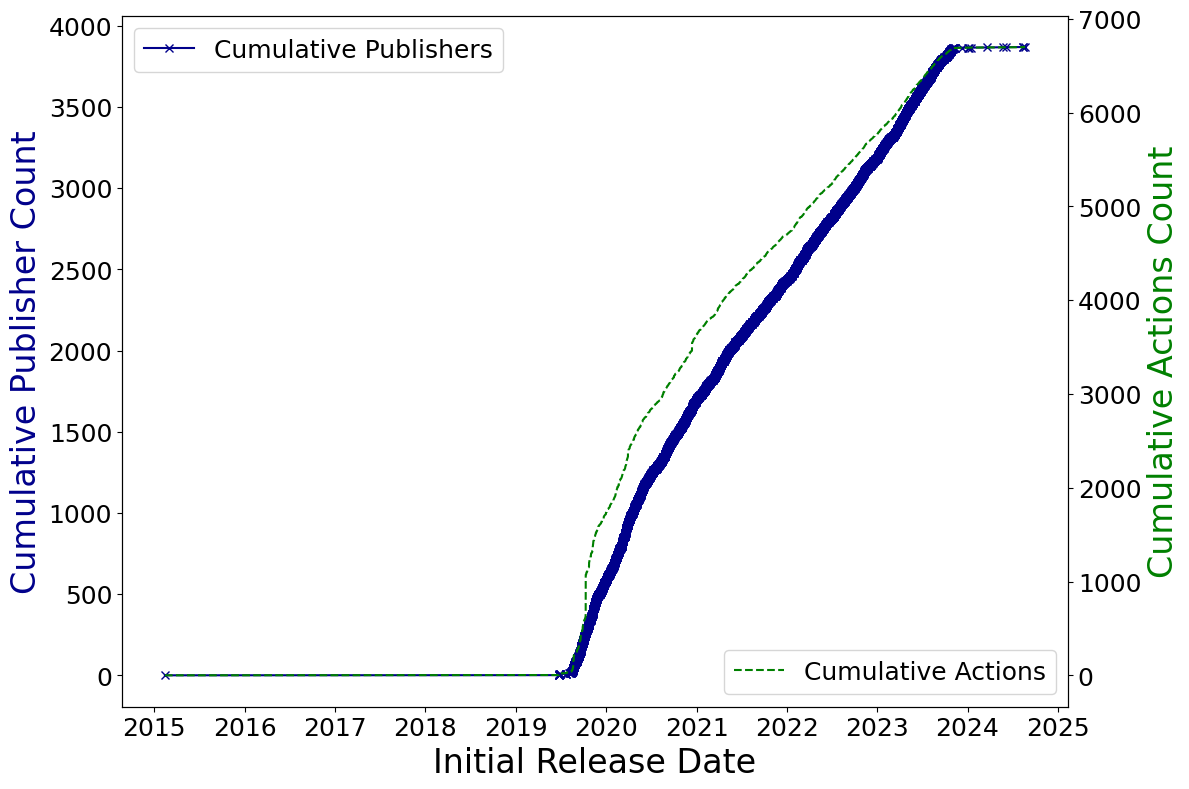

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame({
    'Action_Name': ['Action A', 'Action B', 'Action C', 'Action A', 'Action B'],
    'publisher': ['Publisher 1', 'Publisher 2', 'Publisher 3', 'Publisher 1', 'Publisher 4'],
    'date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-01-01', '2023-02-01']
})

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by='date')

# Initialize an empty set to keep track of unique publishers
unique_publishers = set()

# Function to calculate cumulative unique publishers up to that point
def cumulative_unique_publishers(row):
    unique_publishers.add(row['publisher'])  # Add current publisher to the set
    return len(unique_publishers)            # Return the current count of unique publishers

# Apply the cumulative counting function to each row
df_sorted['cumulative_publishers'] = df_sorted.apply(cumulative_unique_publishers, axis=1)

# Calculate cumulative actions per date
df_sorted['cumulative_actions'] = df_sorted.groupby('date')['Action_Name'].transform('count').cumsum()

# Plotting
plt.figure(figsize=(12, 8))

# Line plot for cumulative publishers
ax1 = plt.gca()  # Get current axis
ax1.plot(df_sorted['date'], df_sorted['cumulative_publishers'], color='darkblue', label='Cumulative Publishers', marker="x")

# Line plot for cumulative actions
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(df_sorted['date'], df_sorted['cumulative_actions'], color='green', linestyle='--', label='Cumulative Actions')

# Adding titles and labels
ax1.set_xlabel('Initial Release Date', fontsize=24)
ax1.set_ylabel('Cumulative Publisher Count', color='darkblue', fontsize=24)
ax2.set_ylabel('Cumulative Actions Count', color='green', fontsize=24)

# Add legends
ax1.legend(loc='upper left', fontsize=18)
ax2.legend(loc='lower right', fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=14)
# Ensure layout fits
plt.tight_layout()

plt.savefig(save_path + '/early_adopter_action_count_outlier2.pdf', format='pdf')
# Display the plot
plt.show()


## without outlier

In [ ]:
path = save_path + "/CI_t0_dataset.csv"
df = pd.read_csv(path)
df = df.sort_values(by='date').reset_index(drop=True)
df = df.drop(index=0).reset_index(drop=True)

In [ ]:
grouped_df = df.groupby('date').agg({
    'publisher': pd.Series.nunique  # count unique developers
}).reset_index()
df_sorted = grouped_df.sort_values(by=['publisher'])
df_sorted.head()

,date,publisher
4581,2024-08-20 15:46:40,1
2873,2022-03-16 01:15:18,1
2874,2022-03-16 05:29:14,1
2875,2022-03-16 20:52:21,1
2876,2022-03-17 01:31:50,1


In [ ]:
import pandas as pd

# Ensure the 'release date' is in datetime format and sort by release date
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by='date')

# Initialize an empty set to keep track of unique developers
unique_developers = set()

# Function to calculate cumulative unique developers up to that point
def cumulative_unique_developers(row):
    unique_developers.add(row['publisher'])  # Add current developer to the set
    return len(unique_developers)            # Return the current count of unique developers

# Apply the cumulative counting function to each row
df_sorted['cumulative_developers'] = df_sorted.apply(cumulative_unique_developers, axis=1)

# Now df_sorted contains a new column with cumulative unique developer counts
print(df_sorted[['date', 'publisher', 'cumulative_developers']])


                    date            publisher  cumulative_developers
0    2019-06-24 20:19:34                jnwng                      1
1    2019-06-24 20:19:34             coursier                      2
2    2019-06-24 20:19:34           MCKanpolat                      3
3    2019-06-24 20:38:21           seemethere                      4
4    2019-06-26 18:22:50               sinoru                      5
...                  ...                  ...                    ...
5000 2024-05-22 14:57:52          arturo-lang                   3867
5001 2024-06-05 09:12:29       ActionsToolbox                   3867
5002 2024-08-12 03:15:59  RageAgainstThePixel                   3868
5003 2024-08-12 03:18:11  RageAgainstThePixel                   3868
5004 2024-08-20 15:46:40         PietroLubini                   3869

[5005 rows x 3 columns]


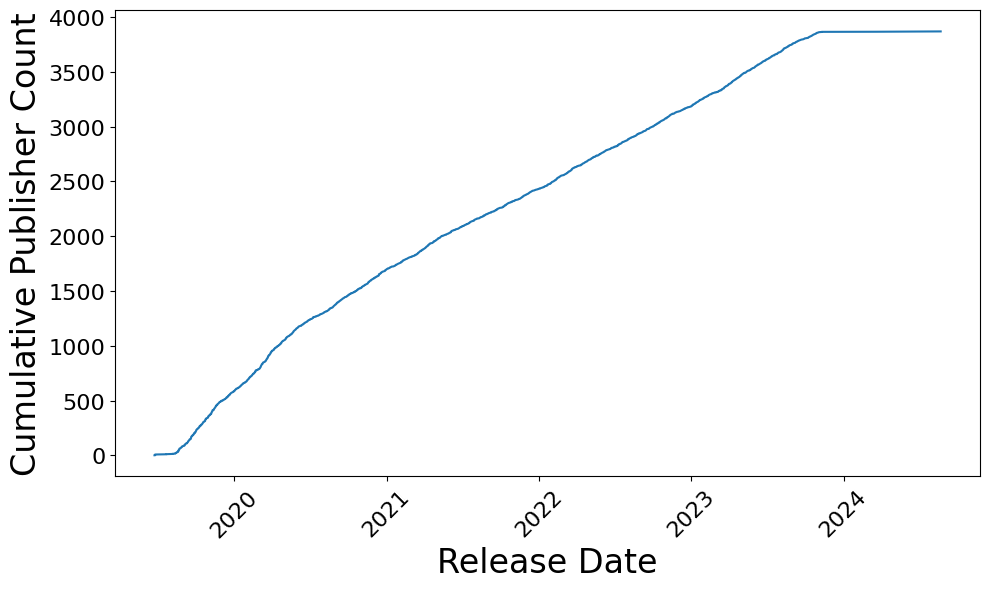

In [ ]:
# Plotting the cumulative unique developers over time
plt.figure(figsize=(10, 6))

# Line plot for cumulative developers
plt.plot(df_sorted['date'], df_sorted['cumulative_developers'])

# Adding titles and labels
# plt.title('Cumulative Unique Publisher Over Time')
plt.xlabel('Release Date', fontsize=24)
plt.ylabel('Cumulative Publisher Count', fontsize=24)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Display the plot
plt.tight_layout()
plt.savefig(save_path + '/early_adopter_outlier.pdf', format='pdf')
plt.show()

## analysis

### t0

In [ ]:
path = save_path + "/CI_t0_dataset.csv"
df = pd.read_csv(path)
df.sort_values(by="publisher")
df['date'] = pd.to_datetime(df['date'])
df_before_2020 = df[df['date'] < '2019-09-01'].reset_index(drop=True)

In [ ]:
len(list(set(list(df_before_2020["publisher"]))))

85

In [ ]:
len(df_before_2020)

90

In [ ]:
df_before_2020.sort_values(by="publisher")

In [ ]:
# Group by 'publisher' and apply multiple aggregations
df_grouped = df_before_2020.groupby('publisher').agg({
    'date': 'min',          # Get the earliest date for each publisher
    'Action_Name': 'count', # Count the number of actions for each publisher
    'Independent': 'sum',
    'subset_count': 'sum',
    'intersect_count': 'sum',
    'same_feat_count': 'sum'
}).reset_index()

df_grouped.rename(columns={'date': 'earliest_date', 'Action_Name': 'action_count'}, inplace=True)

print(df_grouped.sort_values(by="publisher"))


NameError: name 'df_before_2020' is not defined

In [ ]:
len(df_grouped)

85

In [ ]:
sum(list(df_grouped["action_count"]))

90

In [ ]:
df_action_count = df_grouped[df_grouped["action_count"] > 1]
print(len(df_action_count))
df_action_count

4


,publisher,earliest_date,action_count,Independent,subset_count,intersect_count,same_feat_count
1,Azure,2019-08-30 15:31:59,2,0,0,17,0
45,garygrossgarten,2019-08-28 19:06:08,2,0,0,330,4
77,varunsridharan,2019-08-23 05:22:43,3,0,0,44,0
80,warrenbuckley,2019-08-16 12:11:22,2,0,0,962,46


In [ ]:
df_indep = df_grouped[df_grouped["Independent"] == 1]
print(len(df_indep))
df_indep

6


,publisher,earliest_date,action_count,Independent,subset_count,intersect_count,same_feat_count
18,TartanLlama,2019-08-21 10:53:56,1,1,0,0,0
19,ToniSantosBalbi,2019-08-28 18:57:45,1,1,0,0,0
39,ergebnis,2019-08-22 18:50:01,1,1,0,0,0
60,mheap,2019-08-28 05:31:41,1,1,0,0,0
76,subosito,2019-08-13 10:11:30,1,1,0,0,0
81,wizzdi,2019-08-27 21:48:32,1,1,0,0,0


In [ ]:
path = save_path + "/CI_t1_dataset.csv"
df1 = pd.read_csv(path)

In [ ]:
# Group by 'publisher' and apply multiple aggregations
df1 = df1.groupby('publisher').agg({
    # 'date': 'min',          # Get the earliest date for each publisher
    'Action Name': 'count', # Count the number of actions for each publisher
    'Independent': 'sum',
    'subset_count': 'sum',
    'intersect_count': 'sum',
    'same_feat_count': 'sum'
}).reset_index()
print(df1.sort_values(by="publisher"))


In [ ]:
indep_publisher = list(df_indep["publisher"])
indep_publisher

['TartanLlama', 'ToniSantosBalbi', 'ergebnis', 'mheap', 'subosito', 'wizzdi']

In [ ]:
filtered_df = df1[df1['publisher'].isin(indep_publisher)]
filtered_df

,publisher,Action Name,Independent,subset_count,intersect_count,same_feat_count
759,TartanLlama,1,1,0,0,0
779,ToniSantosBalbi,1,0,0,916,0
1687,ergebnis,1,1,0,0,0
2580,mheap,3,1,226,49,2
3415,subosito,1,0,0,1,0
3732,wizzdi,1,0,0,4,0


In [ ]:
df_sub = df_grouped[df_grouped["subset_count"] > 0]
print(len(df_sub))
df_sub

7


,publisher,earliest_date,action_count,Independent,subset_count,intersect_count,same_feat_count
22,afgallo,2019-08-13 15:31:07,1,0,3,0,5
32,coursier,2019-06-24 20:19:34,1,0,1,281,404
41,ewpratten,2019-08-26 14:27:47,1,0,2,461,44
48,ivoilic,2019-08-13 15:31:07,1,0,3,0,5
56,leventeBajczi,2019-08-25 22:16:24,1,0,4,0,1
78,vetflux-dev,2019-08-13 15:31:07,1,0,3,0,5
84,zcodeid,2019-08-22 01:11:18,1,0,5,0,0


In [ ]:
df_sub.sort_values(by="earliest_date")

,publisher,earliest_date,action_count,Independent,subset_count,intersect_count,same_feat_count
32,coursier,2019-06-24 20:19:34,1,0,1,281,404
22,afgallo,2019-08-13 15:31:07,1,0,3,0,5
48,ivoilic,2019-08-13 15:31:07,1,0,3,0,5
78,vetflux-dev,2019-08-13 15:31:07,1,0,3,0,5
84,zcodeid,2019-08-22 01:11:18,1,0,5,0,0
56,leventeBajczi,2019-08-25 22:16:24,1,0,4,0,1
41,ewpratten,2019-08-26 14:27:47,1,0,2,461,44


In [ ]:
sub_publisher = list(df_sub["publisher"])
sub_publisher

['afgallo',
 'coursier',
 'ewpratten',
 'ivoilic',
 'leventeBajczi',
 'vetflux-dev',
 'zcodeid']

In [ ]:
filtered_df = df1[df1['publisher'].isin(sub_publisher)]
filtered_df

,publisher,Action Name,Independent,subset_count,intersect_count,same_feat_count
914,afgallo,1,0,0,10,0
1410,coursier,2,0,0,29,0
1710,ewpratten,1,0,0,28,0
2063,ivoilic,1,0,8,0,2
2374,leventeBajczi,1,0,0,419,0
3655,vetflux-dev,1,0,0,87,0
3830,zcodeid,1,0,0,0,1


In [ ]:
df_inter = df_grouped[df_grouped["intersect_count"] > 0]
print(len(df_inter))
inter_publisher = list(df_inter["publisher"])
df_inter

70


,publisher,earliest_date,action_count,Independent,subset_count,intersect_count,same_feat_count
0,8398a7,2019-08-15 15:38:59,1,0,0,3,0
1,Azure,2019-08-30 15:31:59,2,0,0,17,0
2,BEFH,2019-08-19 16:46:03,1,0,0,65,2
3,ButterCam,2019-08-24 11:46:13,1,0,0,9,1
4,Geertvdc,2019-08-24 11:46:13,1,0,0,9,1
...,...,...,...,...,...,...,...
77,varunsridharan,2019-08-23 05:22:43,3,0,0,44,0
79,vimeda,2019-08-23 06:52:25,1,0,0,14,7
80,warrenbuckley,2019-08-16 12:11:22,2,0,0,962,46
82,worldroot,2019-08-19 05:03:03,1,0,0,7,5


In [ ]:
filtered_df = df1[df1['publisher'].isin(inter_publisher)]
filtered_df

,publisher,Action Name,Independent,subset_count,intersect_count,same_feat_count
19,8398a7,1,0,0,21,0
87,Azure,35,0,2,2698,4
88,BEFH,1,0,0,15,0
127,ButterCam,1,0,0,8,0
290,Geertvdc,1,0,0,14,0
...,...,...,...,...,...,...
3643,varunsridharan,4,0,0,500,0
3664,vimeda,1,0,1,422,0
3697,warrenbuckley,2,0,0,19,0
3742,worldroot,1,0,2,9,2


In [ ]:
df_same = df_grouped[df_grouped["same_feat_count"] > 0]
print(len(df_same))
same_publisher = list(df_same["publisher"])
df_same

63


,publisher,earliest_date,action_count,Independent,subset_count,intersect_count,same_feat_count
2,BEFH,2019-08-19 16:46:03,1,0,0,65,2
3,ButterCam,2019-08-24 11:46:13,1,0,0,9,1
4,Geertvdc,2019-08-24 11:46:13,1,0,0,9,1
5,Harmon758,2019-08-19 05:03:03,1,0,0,7,5
6,HermitSun,2019-08-21 10:19:35,1,0,0,15,7
...,...,...,...,...,...,...,...
78,vetflux-dev,2019-08-13 15:31:07,1,0,3,0,5
79,vimeda,2019-08-23 06:52:25,1,0,0,14,7
80,warrenbuckley,2019-08-16 12:11:22,2,0,0,962,46
82,worldroot,2019-08-19 05:03:03,1,0,0,7,5


In [ ]:
filtered_df = df1[df1['publisher'].isin(same_publisher)]
filtered_df

,publisher,Action Name,Independent,subset_count,intersect_count,same_feat_count
88,BEFH,1,0,0,15,0
127,ButterCam,1,0,0,8,0
290,Geertvdc,1,0,0,14,0
328,Harmon758,1,0,2,9,2
336,HermitSun,1,0,0,19,0
...,...,...,...,...,...,...
3655,vetflux-dev,1,0,0,87,0
3664,vimeda,1,0,1,422,0
3697,warrenbuckley,2,0,0,19,0
3742,worldroot,1,0,2,9,2


# Migratory behaviour

In [ ]:
path = "./CI_t0_dataset.csv"
df0 = pd.read_csv(path)
df0 = df0.sort_values(by="Action_Name").reset_index(drop=True)
all_t0_features = []
for i in range(len(df0.index)):
  features = ast.literal_eval(df0["Processed_Features"][i])
  all_t0_features.extend(features)

df_all_feat_0 = pd.DataFrame(list(set(all_t0_features)), columns=['Feature'])

In [ ]:
df_all_feat_0.to_csv("./CI_t0_all_feat.csv", index=False)

In [ ]:
path = "./CI_t1_dataset.csv"
df1 = pd.read_csv(path)
df1 = df1.sort_values(by="Action Name").reset_index(drop=True)
all_t1_features = []
for i in range(len(df1.index)):
  features = ast.literal_eval(df1["Processed_Features"][i])
  all_t1_features.extend(features)

df_all_feat_1 = pd.DataFrame(list(set(all_t1_features)), columns=['Feature'])

In [ ]:
df_all_feat_1.to_csv("./CI_t1_all_feat.csv", index=False)

In [ ]:
len(df_all_feat_0)

12215

In [ ]:
len(df_all_feat_1)

18081

In [ ]:
all_features = []
all_features.extend(all_t0_features)
all_features.extend(all_t1_features)
all_features_clean = list(set(all_features))

df_all_feat = pd.DataFrame(list(set(all_features_clean)), columns=['Feature'])
len(df_all_feat)

20898

In [ ]:
df_all_feat.to_csv("./CI_all_feat.csv", index=False)

## Combine t0-t1

In [ ]:
df_renamed_0 = df0.rename(columns={'Processed_Features': 'Processed_Features_t0', 'Independent':'Independent_t0', 'Single_featured': 'Single_featured_t0','subset_count': 'subset_count_t0', 'super_set_actions':'super_set_actions_t0', 'intersect_count':'intersect_count_t0', 'intersecting_actions':'intersecting_actions_t0', 'same_feat_count':'same_feat_count_t0', 'actions_with_same_features':'actions_with_same_features_t0'})
df_renamed_1 = df1.rename(columns={'Action Name':'Action_Name','Processed_Features': 'Processed_Features_t1', 'Independent':'Independent_t1', 'Single_featured': 'Single_featured_t1','subset_count': 'subset_count_t1', 'super_set_actions':'super_set_actions_t1', 'intersect_count':'intersect_count_t1', 'intersecting_actions':'intersecting_actions_t1', 'same_feat_count':'same_feat_count_t1', 'actions_with_same_features':'actions_with_same_features_t1'})
df_combined = pd.merge(df_renamed_0, df_renamed_1, on='Action_Name')
df_combined.to_csv( "/content/drive/MyDrive/JSS_analysis/CI_combined_dataset.csv")
df = df_combined

## Weak Migration

A feature has a weak migration if it
was present in at least one category at t0 and migrated to at
least one new Action at t1. The features may disappear from
one or all Actions it resided in at time t1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/JSS_analysis/CI_combined_dataset.csv")

In [ ]:
#Weak migration: features in t0 presented  was not in Processed_Features_t0 but now in Processed_Features_t11
df_all_feat["count_WM"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_WM = 0
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if feature not in t0_features and feature in t1_features:
      count_WM += 1
  df_all_feat["count_WM"][i] =  count_WM
  print ("Count at " + str(i) + ": " + str(count_WM))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_wm.csv", index=False)

## Strong Migration

Similar to weak migration, a feature has a Strong migration if it was present in at least one Action at $t_0$ and migrated to at least one new  Action at $t_1$ with the difference that the features remain with all the Actions it resided in at $t_0$

In [ ]:
#strong migration: features in t0 presented  was not in Processed_Features_t0 but now in Processed_Features_t11
df_all_feat["count_SM"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_SM = 0
  ## Feature remains in all actions it was in at time t0
  feat_remains = True
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if (feature in t0_features and feature in t1_features):
      feat_remains = True
    else:
      feat_remains = False
      break

  if feat_remains:
    ## features remains in all action it was in at t0 at t1
    ## check if feature appears in at one new actions
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features:
        count_SM += 1
  df_all_feat["count_SM"][i] =  count_SM
  print ("Count at " + str(i) + ": " + str(count_SM))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_sm.csv", index=False)

## Weak Exodus

This behaviour is a special case of weak migration where a feature at $t_1$ disappears from at least one Action it resided in at $t_0$ and appears in at least one new Action at time $t_1$

In [ ]:
df_all_feat["count_WE"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_WE = 0
  ## feature at t1 disappears from at least one Action it resided in at t0
  feat_disappears = False
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if feature in t0_features and feature not in t1_features:
      feat_disappears = True
      break

  ## Feature appears in at least one new Action at time t1
  if feat_disappears:
    ## check if feature appears in at one new actions
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features:
        count_WE += 1
  df_all_feat["count_WE"][i] =  count_WE
  print ("Count at " + str(i) + ": " + str(count_WE))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_WE.csv", index=False)

## Strong Exodus

This behaviour is another special case of weak migration where a feature at $t_1$ disappears from all Action it resided in at $t_0$ and appears in at least one new Action at time $t_1$

In [ ]:
df_all_feat["count_SE"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_SE = 0
  ## feature at t1 disappears from all Action it resided in at t0
  feat_disappears_from_all = True
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if feature in t0_features and feature not in t1_features:
      feat_disappears_from_all = True
    else:
      feat_disappears_from_all = False
      break


  # ## Feature appears in at least one new Action at time t1
  if feat_disappears_from_all:
    ## check if feature appears in at one new actions
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features:
        count_SE += 1
  df_all_feat["count_SE"][i] =  count_SE
  print ("Count at " + str(i) + ": " + str(count_SE))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_SE.csv", index=False)

## Birth

This behaviour is a special case of Strong Exodus where the feature does not exist in any actions at $t_0$ and appears in one Action at $t_1$

In [ ]:
df_all_feat["count_birth"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_birth = 0
  ## feature at is not in t_0
  found_feature = False
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    if feature in t0_features:
      found_feature = True
      break

  if found_feature == False:
  #   ## check if feature appears in at one new actions
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features:
        count_birth += 1
  df_all_feat["count_birth"][i] =  count_birth
  print ("Count at " + str(i) + ": " + str(count_birth))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_birth.csv", index=False)

## Intransitive

In this type of behaviour, the feature at $t_1$ does not disappear from any actions it previously resided in nor it does appear in any new Action.

In [ ]:
df_all_feat = pd.read_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_birth.csv")
df_all_feat.head()

,Feature,count_WM,count_SM,count_WE,count_SE,count_birth
0,retrieve repository package,1,0,1,0,0
1,build architecture eg amd64arm,1,0,0,0,1
2,list filtered path using specified pattern sep...,1,0,0,0,1
3,read arn friendly name secret,1,0,0,0,1
4,deploy zip file aws elastic beanstalk,0,0,0,0,0


In [ ]:
# In this type of behaviour, the feature at $t_1$ does not disappear from any actions it previously resided in nor it does appear in any new Action.
df_all_feat["count_Intransitive"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_Intransitive = 0
  ## feature at is t0 then it is in t1
  feature_disappear = False
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if feature in t0_features and feature not in t1_features:
      feature_disappear = True
      break

  if feature_disappear == False:
  # #   ## check if feature does not appear in any new action
    feature_in_new_Action = False
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features: ## feature appears in new action
        feature_in_new_Action = True
        break

    if feature_in_new_Action == False:
      for j in range(len(df.index)):
        t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
        if feature in t0_features: count_Intransitive += 1
      df_all_feat["count_Intransitive"][i] = count_Intransitive

  print ("Count at " + str(i) + ": " + str(count_Intransitive))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_intra.csv", index=False)

## Weak Extinction

 A feature experiences weak extinction if it disappears from at least one Action at $t_1$ and does not appear in any new Action

In [ ]:

df_all_feat["count_WExtinct"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_WExtinct = 0
  ## feature at is t0 then but not in t1 -- one is enough
  feature_disappear = False
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if feature in t0_features and feature not in t1_features:
      feature_disappear = True
      break

  if feature_disappear:
    ## check if feature does not appear in any new action
    feature_in_new_Action = False
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features: ## feature appears in one new action
        feature_in_new_Action = True
        break

    if feature_in_new_Action == False:
      for j in range(len(df.index)):
        t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
        if feature in t0_features: count_WExtinct += 1
      df_all_feat["count_WExtinct"][i] = count_WExtinct

  print ("Count at " + str(i) + ": " + str(count_WExtinct))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_wExtinct.csv", index=False)

## Strong Extinction

Similar to weak extinction, the feature is said to have strong extinction if it does not appear in any new Action at $t_1$ and while disappearing from all Actions

In [ ]:

df_all_feat["count_SExtinct"] = ""
for i in range(len(df_all_feat.index)):
  feature = df_all_feat["Feature"][i]
  count_SExtinct = 0
  ## feature at is t0 then but not in t1 -- all Actions
  feature_disappear = True
  for j in range(len(df.index)):
    t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
    t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
    if feature in t0_features and feature in t1_features:
      feature_disappear = False
      break

  if feature_disappear:
    ## check if feature does not appear in any new action
    feature_in_new_Action = False
    for j in range(len(df.index)):
      t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
      t1_features =  ast.literal_eval(df["Processed_Features_t1"][j])
      if feature not in t0_features and feature in t1_features: ## feature appears in one new action
        feature_in_new_Action = True
        break

    if feature_in_new_Action == False:
      for j in range(len(df.index)):
        t0_features =  ast.literal_eval(df["Processed_Features_t0"][j])
        if feature in t0_features: count_SExtinct += 1
      df_all_feat["count_SExtinct"][i] = count_SExtinct

  print ("Count at " + str(i) + ": " + str(count_SExtinct))

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_sExtinct.csv", index=False)

In [ ]:
for i in range(len(df_all_feat.index)):
  count_Intransitive = df_all_feat["count_SExtinct"][i]
  if type(count_Intransitive) != int:
    df_all_feat["count_SExtinct"][i] = 0

df_all_feat.head()

,Feature,count_WM,count_SM,count_WE,count_SE,count_birth,count_Intransitive,count_WExtinct,count_SExtinct
0,retrieve repository package,1,0,1,0,0,0,0,0
1,build architecture eg amd64arm,1,0,0,0,1,0,0,0
2,list filtered path using specified pattern sep...,1,0,0,0,1,0,0,0
3,read arn friendly name secret,1,0,0,0,1,0,0,0
4,deploy zip file aws elastic beanstalk,0,0,0,0,0,1,0,0


In [ ]:
len(df_all_feat[df_all_feat["count_SExtinct"]>0])

2817

In [ ]:
df_all_feat.to_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_migratory_behaviour.csv", index=False)

## analysis

In [4]:
df_all_feat = pd.read_csv("/content/drive/MyDrive/JSS_analysis/CI_all_feat_migratory_behaviour.csv")
df_all_feat.head()

,Feature,count_WM,count_SM,count_WE,count_SE,count_birth,count_Intransitive,count_WExtinct,count_SExtinct
0,retrieve repository package,1,0,1,0,0,0,0,0
1,build architecture eg amd64arm,1,0,0,0,1,0,0,0
2,list filtered path using specified pattern sep...,1,0,0,0,1,0,0,0
3,read arn friendly name secret,1,0,0,0,1,0,0,0
4,deploy zip file aws elastic beanstalk,0,0,0,0,0,1,0,0


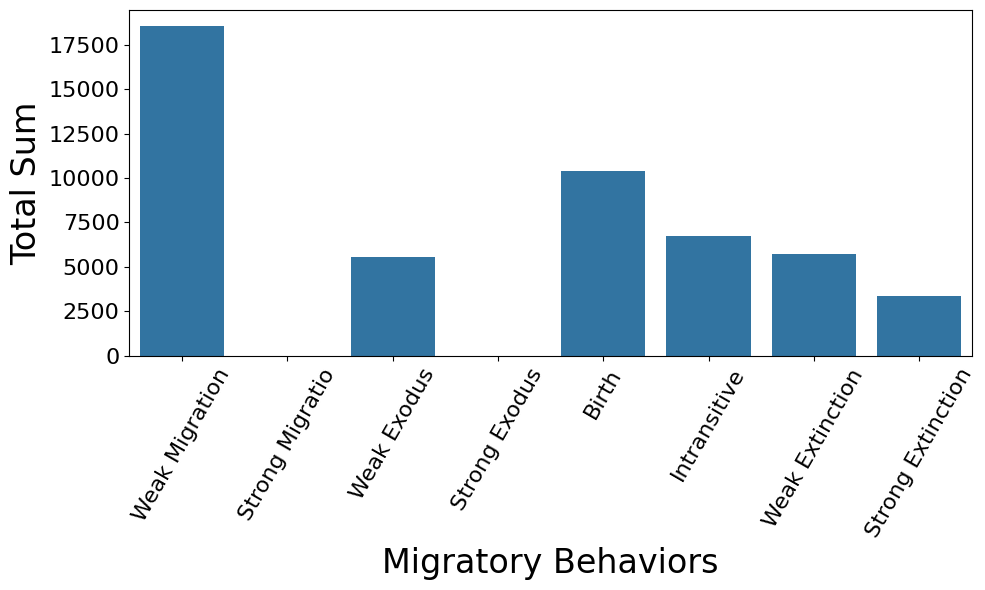

In [5]:
df_dropped = df_all_feat.drop(columns=['Feature'])
sums = df_dropped.sum()

# Create a DataFrame for plotting
df_sums = pd.DataFrame({
    'Column': sums.index,
    'Sum': sums.values
})

# Create the count plot (actually a bar plot in this case)
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Sum', data=df_sums)

plt.xlabel('Migratory Behaviors', fontsize=24)
plt.ylabel('Total Sum', fontsize=24)
new_labels = ['Weak Migration', 'Strong Migratio', 'Weak Exodus', 'Strong Exodus', 'Birth', 'Intransitive', 'Weak Extinction', 'Strong Extinction' ]  # Your desired x-axis labels
plt.xticks(rotation=60, ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=new_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(save_path + '/mig_beh_sums.pdf', format='pdf')
plt.show()

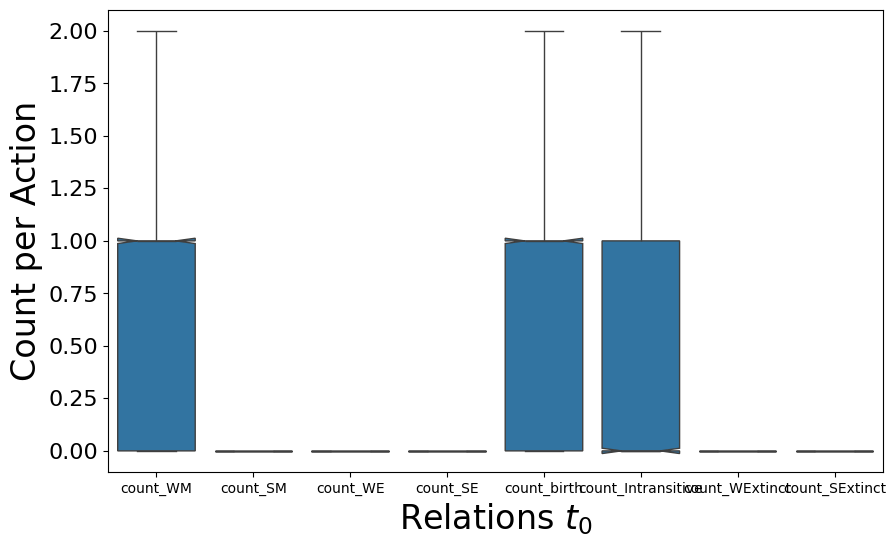

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns
subset = df_all_feat[['count_WM', 'count_SM', 'count_WE', 'count_SE', 'count_birth', 'count_Intransitive', 'count_WExtinct', 'count_SExtinct']]

# Remove outliers using the IQR method
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
subset_filtered = subset[~((subset < (Q1 - 1.5 * IQR)) | (subset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Melt the DataFrame for seaborn boxplot
df_melted = subset_filtered.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch=True)
plt.xlabel('Relations ' + r'$t_0$', fontsize=24)
plt.ylabel('Count per Action', fontsize=24)
plt.yticks(fontsize=16)
plt.show()


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/JSS_analysis/CI_combined_dataset.csv")

In [12]:
df['date'] = pd.to_datetime(df['date'])
cutoff_date = pd.Timestamp('2024-01-01')

# Filter out rows where the date is after the cutoff date
df_filtered = df[df['date'] <= cutoff_date]
len(df_filtered)

4997

In [ ]:
df_filtered = df_filtered.sort_values(by="date")

In [ ]:
df["count_WM"] = 0; df["count_SM"] = 0; df["count_WE"] = 0; df["count_SE"] = 0
df["count_birth"] = 0; df["count_Intransitive"] = 0; df["count_WExtinct"] = 0; df["count_SExtinct"] = 0

for i in range(len(df.index)):
  t0_feat = ast.literal_eval(df["Processed_Features_t0"][i])
  t1_feat = ast.literal_eval(df["Processed_Features_t1"][i])
  all_features = []
  all_features.extend(t0_feat)
  all_features.extend(t1_feat)
  all_features = list(set(all_features))
  count_WM = 0; count_SM = 0; count_WE = 0; count_SE = 0
  count_birth = 0; count_Intransitive = 0; count_WExtinct = 0; count_SExtinct = 0
  for feature in all_features:
    df_feat = df_all_feat[df_all_feat["Feature"] == feature].reset_index(drop=True)
    if df_feat["count_WM"][0] > 0: count_WM += 1
    if df_feat["count_SM"][0] > 0: count_SM += 1
    if df_feat["count_WE"][0] > 0: count_WE += 1
    if df_feat["count_SE"][0] > 0: count_SE += 1
    if df_feat["count_birth"][0] > 0: count_birth += 1
    if df_feat["count_Intransitive"][0] > 0: count_Intransitive += 1
    if df_feat["count_WExtinct"][0] > 0: count_WExtinct += 1
    if df_feat["count_SExtinct"][0] > 0: count_SExtinct += 1

  df["count_WM"][i] = count_WM; df["count_SM"][i] = count_SM; df["count_WE"][i] = count_WE
  df["count_SE"][i] = count_SE; df["count_birth"][i] = count_birth
  df["count_Intransitive"][i] = count_Intransitive; df["count_WExtinct"][i] = count_WExtinct
  df["count_SExtinct"][i] = count_SExtinct

  print(i)


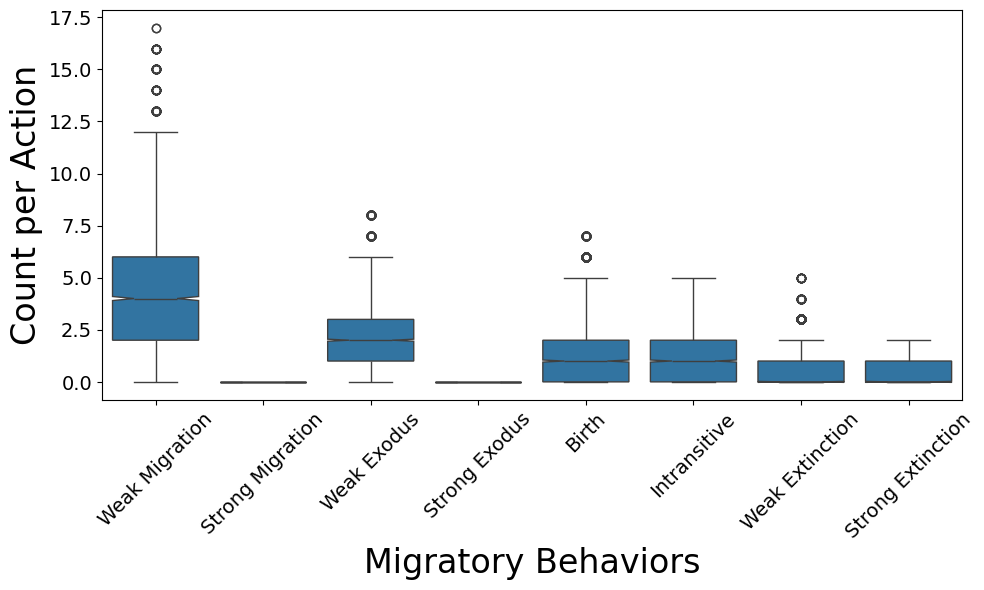

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns
subset = df[['count_WM', 'count_SM', 'count_WE', 'count_SE', 'count_birth', 'count_Intransitive', 'count_WExtinct', 'count_SExtinct']]

# Remove outliers using the IQR method
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1

# # Filtering out outliers
subset_filtered = subset[~((subset < (Q1 - 1.5 * IQR)) | (subset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Melt the DataFrame for seaborn boxplot
df_melted = subset_filtered.melt(var_name='Column', value_name='Value')

# Create the boxplot for the subset of columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=df_melted, notch=True)
plt.xlabel('Migratory Behaviors', fontsize=24)
plt.ylabel('Count per Action', fontsize=24)
new_labels = ['Weak Migration', 'Strong Migration','Weak Exodus','Strong Exodus', 'Birth', 'Intransitive', 'Weak Extinction', 'Strong Extinction']  # Change according to your columns
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, fontsize=14, rotation=45)
plt.yticks( fontsize=14)
plt.tight_layout()
plt.savefig(save_path + '/mig_beh_action_count_no_outlier.pdf', format='pdf')
plt.show()

In [ ]:
df_dropped = df.drop(columns=['Single_featured_t0','Single_featured_t1','count_SM','count_SE','intersecting_actions_t1','super_set_actions_t1','actions_with_same_features_t1','Unnamed: 0', 'star','action_file_descriptions', 'Processed_Features_t1' ,"action_name_used", "Contributors", "actions_with_same_features_t0",'Action_Name', 'date', 'Processed_Features_t0', 'super_set_actions_t0', 'intersecting_actions_t0', 'publisher_x', 'verified creator', 'publisher_y'])

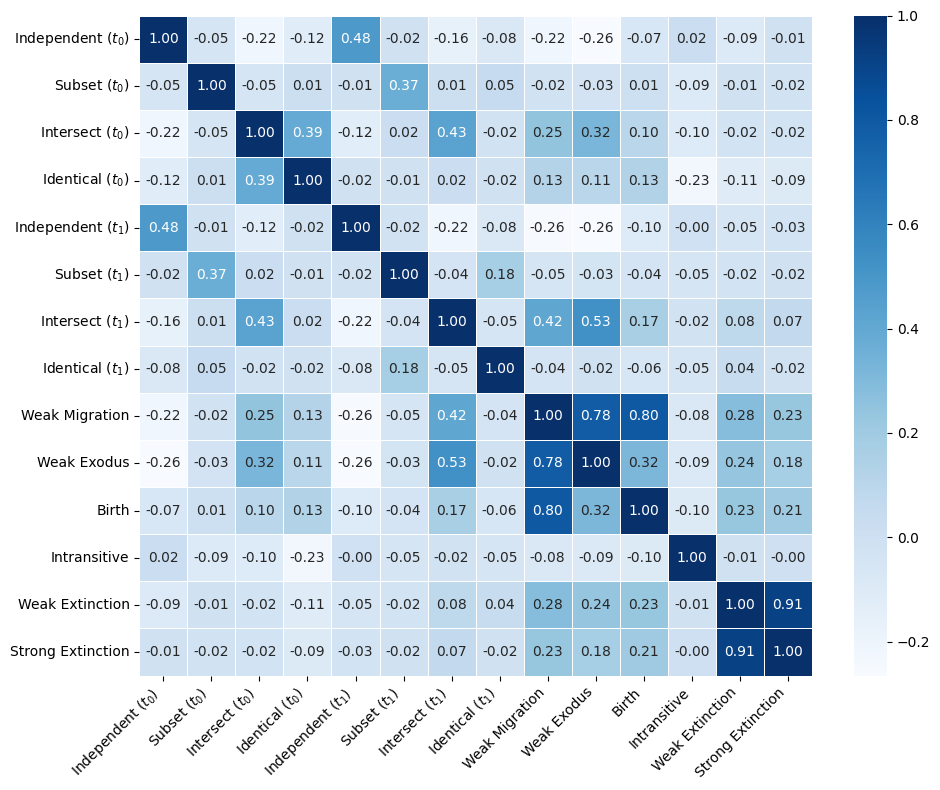

In [25]:
# Compute the correlation matrix
correlation_matrix = df_dropped.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Define new tick labels (both x and y)
new_labels = ['Independent ' + r'$(t_0)$', 'Subset ' + r'$(t_0)$', 'Intersect ' + r'$(t_0)$', 'Identical ' + r'$(t_0)$',
              'Independent ' + r'$(t_1)$', 'Subset ' + r'$(t_1)$', 'Intersect ' + r'$(t_1)$', 'Identical ' + r'$(t_1)$',
              'Weak Migration', 'Weak Exodus', 'Birth', 'Intransitive', 'Weak Extinction', 'Strong Extinction']

# Ensure the number of new labels matches the dimensions of the correlation matrix
if len(new_labels) != correlation_matrix.shape[0]:
    print(f"Error: The number of labels ({len(new_labels)}) does not match the matrix dimensions ({correlation_matrix.shape[0]}).")

# Set the tick positions at the center of the heatmap cells
ax.set_xticks([x + 0.5 for x in range(correlation_matrix.shape[1])])  # Shift ticks to the center
ax.set_yticks([y + 0.5 for y in range(correlation_matrix.shape[0])])

# Set the tick labels
ax.set_xticklabels(new_labels, rotation=45, ha='right')
ax.set_yticklabels(new_labels, rotation=0)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(save_path + '/all_corr_heatmap.pdf', format='pdf')
plt.show()


In [ ]:
df_dropped = df_dropped[df_dropped["count_WM"] == 0]
df_dropped = df_dropped[df_dropped["count_birth"] == 0]
df_dropped = df_dropped[df_dropped["count_Intransitive"] == 0]
df_dropped = df_dropped[df_dropped["count_WExtinct"] == 0]
print(len(df_dropped))
df_dropped

0


,Independent_t0,subset_count_t0,intersect_count_t0,same_feat_count_t0,Independent_t1,subset_count_t1,intersect_count_t1,same_feat_count_t1,count_WM,count_WE,count_birth,count_Intransitive,count_WExtinct,count_SExtinct
